# proposal
gather data from film databasees to demonstrate which genre/writters/directors/actors in films are most profiatble at the box office, over a relatively short period of time

In [1]:
#pandas for reading data and converting them to DataFrameds for using Dataframe methods. 
#numpy and scipy for calculating said data
import pandas as pd
import numpy as np
import scipy as sp
#create graphs of the data that has been analyzed
import matplotlib.pyplot as plt
#make said graphs "prettier" and more enjoyable to read
import seaborn as sns
#view matplots in this notebook
%matplotlib inline

i need to gather films that were highest grossing at the box office. and if available, the names of directors, writters and actors in said films. and just to make sure my biases arent effecting the data too much, the rating for each film. 

after doing the below steps, i will go back to the origional data to see if there are other correlations

1) read all available databases and see what data is inside
2) covert to pandas Dataframes and remove columns that are not part of my hypothesis. 
3) join dataframes based on film title and get average rating
4) make four dataframes, one joined based on genre, one on writters, one on directors, one on actors, and make graphs
    for each based on pearson correlation, and see which has the highest correlation
    
the tables available *Box Office Mojo* database with gross revenue
*IMDB* databases with movie title, actors, directors, writters seperate tables

i will need to join those tables and order them by titles


after looking through all the databases and finding missing titles that were definitely profitable, i have decided to use
a joined table of The Numbers databse, and Watch Mojo database as the main database, and then join to it and compare against it

In [2]:
imdb_film_title = pd.read_csv("unzipped-data/imdb.title.basics.csv")
imdb_film_title.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [99]:
imdb_film_title.loc[imdb_film_title['primary_title'].str.contains('Jurassic')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
27027,tt2071491,Jurassic Shark,Jurassic Shark,2012,75.0,"Action,Adventure,Comedy"
48787,tt2905674,Jurassic City,Jurassic City,2015,88.0,"Action,Adventure,Comedy"
54628,tt3210078,Jurassic: Stoned Age,Jurassic: Stoned Age,2013,96.0,"Action,Adventure,Comedy"
59810,tt3469284,Jurassic Prey,Jurassic Prey,2015,87.0,"Action,Adventure,Comedy"
72331,tt4130956,Jurassic Park: Operation Rebirth,Jurassic Park: Operation Rebirth,2014,70.0,Thriller
81615,tt4693418,Back to the Jurassic,Back to the Jurassic,2015,86.0,Animation
84414,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"
86283,tt5001456,Jurassic Predator,Jurassic Predator,2018,90.0,"Action,Adventure,Comedy"
91698,tt5303106,The Jurassic Dead,Z/Rex: The Jurassic Dead,2017,82.0,"Action,Adventure,Comedy"


In [3]:
box_mojo_gross = pd.read_csv("unzipped-data/bom.movie_gross.csv")
box_mojo_gross.head(6)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010


In [98]:
box_mojo_gross.loc[box_mojo_gross['title'].str.contains('Jurassic')]

,title,studio,domestic_gross,foreign_gross,year
1190,Jurassic Park 3D,Uni.,45400000.0,71100000,2013
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
2308,Back to the Jurassic,CJ,4400.0,NaN,2015
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018


In [4]:
people_involved_profession_relatedTitles = pd.read_csv("unzipped-data/imdb.name.basics.csv")
people_involved_profession_relatedTitles.head(7)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"


In [5]:
film_title_crew_reference_index = pd.read_csv("unzipped-data/imdb.title.crew.csv")
film_title_crew_reference_index.head(7)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
5,tt0879859,nm2416460,NaN
6,tt0996958,nm2286991,"nm2286991,nm2651190"


In [6]:
job_title_category_index = pd.read_csv("unzipped-data/imdb.title.principals.csv")
job_title_category_index.head(7)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"


In [8]:
job_title_category_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [9]:
imdb_ratings_index = pd.read_csv("unzipped-data/imdb.title.ratings.csv")
imdb_ratings_index.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
the_numbers_gross = pd.read_csv("unzipped-data/tn.movie_budgets.csv")
the_numbers_gross.head(7)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"


In [11]:
the_numbers_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [96]:
the_numbers_gross.loc[the_numbers_gross['movie'].str.contains('Jurassic')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1.305773e+09
429,30,"Jul 18, 2001",Jurassic Park III,93000000,181166115,3.659000e+08
630,31,"May 22, 1997",The Lost World: Jurassic Park,75000000,229086679,6.186390e+08
824,25,"Jun 11, 1993",Jurassic Park,63000000,395708305,1.038813e+09


In [12]:
the_numbers_gross['domestic_gross'] = the_numbers_gross['domestic_gross'].str.replace(r'\D', '').astype(int)

C:\Users\yonic\AppData\Local\Temp/ipykernel_5592/566704501.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['domestic_gross'] = the_numbers_gross['domestic_gross'].str.replace(r'\D', '').astype(int)


In [13]:
the_numbers_gross['production_budget'] = the_numbers_gross['production_budget'].str.replace(r'\D', '').astype(int)

C:\Users\yonic\AppData\Local\Temp/ipykernel_5592/1828636146.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['production_budget'] = the_numbers_gross['production_budget'].str.replace(r'\D', '').astype(int)


In [14]:
the_numbers_gross['worldwide_gross'] = the_numbers_gross['worldwide_gross'].str.replace(r'\D', '').astype(float)

C:\Users\yonic\AppData\Local\Temp/ipykernel_5592/2739544300.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['worldwide_gross'] = the_numbers_gross['worldwide_gross'].str.replace(r'\D', '').astype(float)


In [15]:
#import sqldf to use sql queries in dataframes and join tables

from pandasql import sqldf

In [16]:
q = """
SELECT *
FROM imdb_film_title
JOIN box_mojo_gross
ON imdb_film_title.primary_title = box_mojo_gross.title
ORDER BY domestic_gross
DESC
"""

pysqldf = lambda query: sqldf(query, globals())

imdb_title_mojo_gross = pysqldf(q)

imdb_title_mojo_gross.head(7)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000,2018
1,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015
3,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
4,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 2,BV,608600000.0,634200000,2018
5,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
6,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",Finding Dory,BV,486300000.0,542300000,2016


In [92]:
q = """
SELECT *
FROM the_numbers_gross
JOIN imdb_film_title 
ON imdb_film_title.primary_title = the_numbers_gross.movie
ORDER BY domestic_gross
DESC

"""

imdb_title_thenumbers_gross = pysqldf(q)

In [93]:
imdb_title_thenumbers_gross.head(11)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,42,"Feb 16, 2018",Black Panther,200000000,700059566,1.348258e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
3,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,tt2495766,Titanic,Titanic,2012,NaN,Adventure
4,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,tt8852130,Titanic,Titanic,2018,115.0,Family
5,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
6,27,"May 4, 2012",The Avengers,225000000,623279547,1.517936e+09,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
7,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1.242521e+09,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation"
8,45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,532177324,1.049103e+09,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi"
9,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1.259200e+09,tt2316801,Beauty and the Beast,La belle et la bête,2014,112.0,"Drama,Fantasy,Romance"


In [19]:
imdb_title_thenumbers_gross['worldwide_gross'][0]

2776345279.0

In [20]:
q = """
SELECt *
FROM imdb_film_title
JOIN imdb_ratings_index
USING(tconst)
WHERE averagerating > 8 AND start_year > 1960
ORDER BY averagerating
DESC

"""

imdb_title_rating = pysqldf(q)

imdb_title_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
1,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5
2,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
3,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
4,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6


In [21]:
imdb_title_thenumbers_gross['domestic_profit'] = imdb_title_thenumbers_gross['domestic_gross'] - imdb_title_thenumbers_gross['production_budget']
imdb_title_thenumbers_gross['intnl_profit'] = imdb_title_thenumbers_gross['worldwide_gross'] - imdb_title_thenumbers_gross['production_budget']
imdb_title_thenumbers_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3815 non-null   object 
 1   primary_title      3815 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   int64  
 4   runtime_minutes    3328 non-null   float64
 5   genres             3743 non-null   object 
 6   id                 3815 non-null   int64  
 7   release_date       3815 non-null   object 
 8   movie              3815 non-null   object 
 9   production_budget  3815 non-null   int64  
 10  domestic_gross     3815 non-null   int64  
 11  worldwide_gross    3815 non-null   float64
 12  domestic_profit    3815 non-null   int64  
 13  intnl_profit       3815 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 417.4+ KB


In [24]:
top_gross = imdb_title_thenumbers_gross.sort_values('domestic_profit', ascending=False)
top_hundred = top_gross.head(100)
top_gross.head(8)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,intnl_profit
1,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",Black Panther,200000000,700059566,1.348258e+09,500059566,1.148258e+09
3,tt2495766,Titanic,Titanic,2012,NaN,Adventure,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,459363944,2.008208e+09
4,tt8852130,Titanic,Titanic,2018,115.0,Family,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,459363944,2.008208e+09
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,437270625,1.433855e+09
7,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1.242521e+09,408581744,1.042521e+09
6,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,"May 4, 2012",The Avengers,225000000,623279547,1.517936e+09,398279547,1.292936e+09
2,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,378815482,1.748134e+09
32,tt9173998,Beauty and the Beast,Beauty and the Beast,2018,60.0,"Family,Fantasy,Musical",86,"Nov 13, 1991",Beauty and the Beast,20000000,376057266,6.084311e+08,356057266,5.884311e+08


In [94]:
imdb_title_thenumbers_gross.loc[imdb_title_thenumbers_gross['movie'].str.contains('Jurassic')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
5,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
18,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1.305773e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"


In [82]:
made_profit = top_gross.loc[top_gross['domestic_profit'] > 1]
made_profit

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,intnl_profit
1,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",Black Panther,200000000,700059566,1.348258e+09,500059566,1.148258e+09
3,tt2495766,Titanic,Titanic,2012,NaN,Adventure,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,459363944,2.008208e+09
4,tt8852130,Titanic,Titanic,2018,115.0,Family,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,459363944,2.008208e+09
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,437270625,1.433855e+09
7,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1.242521e+09,408581744,1.042521e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,tt4379536,Slam,Slam: Tutto per una ragazza,2016,100.0,"Comedy,Drama,Romance",53,"Oct 9, 1998",Slam,1000000,1009819,1.087521e+06,9819,8.752100e+04
2713,tt6037866,Slam,Slam,2018,115.0,Drama,53,"Oct 9, 1998",Slam,1000000,1009819,1.087521e+06,9819,8.752100e+04
2570,tt0800353,Nemesis,Nemesis,2010,83.0,Drama,30,"Jan 29, 1993",Nemesis,2000000,2001124,2.001124e+06,1124,1.124000e+03
2571,tt10022974,Nemesis,Nemesis,2019,NaN,"Action,Thriller",30,"Jan 29, 1993",Nemesis,2000000,2001124,2.001124e+06,1124,1.124000e+03


In [83]:
made_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 1 to 2572
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1506 non-null   object 
 1   primary_title      1506 non-null   object 
 2   original_title     1506 non-null   object 
 3   start_year         1506 non-null   int64  
 4   runtime_minutes    1326 non-null   float64
 5   genres             1482 non-null   object 
 6   id                 1506 non-null   int64  
 7   release_date       1506 non-null   object 
 8   movie              1506 non-null   object 
 9   production_budget  1506 non-null   int64  
 10  domestic_gross     1506 non-null   int64  
 11  worldwide_gross    1506 non-null   float64
 12  domestic_profit    1506 non-null   int64  
 13  intnl_profit       1506 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 176.5+ KB


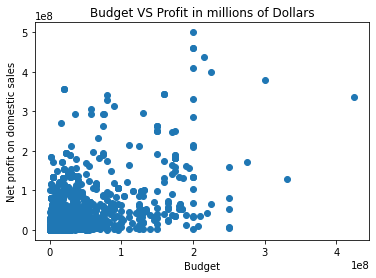

In [74]:
plt.scatter(made_profit['production_budget'], made_profit['domestic_profit'])
plt.title("Budget VS Profit in millions of Dollars")
plt.xlabel("Budget")
plt.ylabel("Net profit on domestic sales");

In [75]:
standev_dom = round(made_profit['domestic_profit'].std(), 0)
standev_dom

60976718.0

In [76]:
better_than_avg_dom = made_profit.loc[made_profit['domestic_profit'] > standev_dom]
better_than_avg_dom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1 to 549
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             292 non-null    object 
 1   primary_title      292 non-null    object 
 2   original_title     292 non-null    object 
 3   start_year         292 non-null    int64  
 4   runtime_minutes    256 non-null    float64
 5   genres             284 non-null    object 
 6   id                 292 non-null    int64  
 7   release_date       292 non-null    object 
 8   movie              292 non-null    object 
 9   production_budget  292 non-null    int64  
 10  domestic_gross     292 non-null    int64  
 11  worldwide_gross    292 non-null    float64
 12  domestic_profit    292 non-null    int64  
 13  intnl_profit       292 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 34.2+ KB


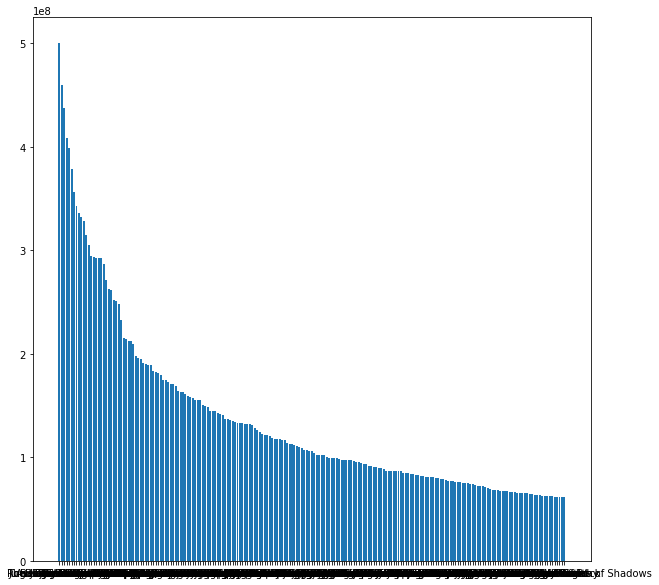

In [77]:
plt.figure(figsize=[10, 10])
plt.bar(better_than_avg_dom['primary_title'], better_than_avg_dom['domestic_profit']);

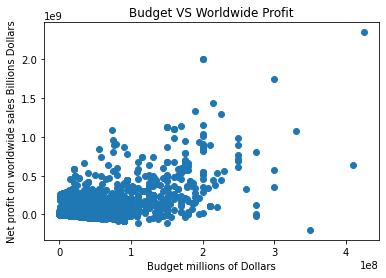

In [28]:
plt.scatter(top_gross['production_budget'], top_gross['intnl_profit'])
plt.title("Budget VS Worldwide Profit")
plt.xlabel("Budget millions of Dollars")
plt.ylabel("Net profit on worldwide sales Billions Dollars");

In [29]:
# need to get the list of movies associated with each person in the involved person
# dataframe, but its a string.
# i need tto turn each one into a list, loop through each list and see if it contains one of the
# tconst values from the top_hundred dataframe. if it does, i need to put the row of the related people_involved
# in a new dataframe to put in a plot
people_involved_profession_relatedTitles['known_for_titles'] = people_involved_profession_relatedTitles['known_for_titles'].astype(str)
people_involved_profession_relatedTitles['known_for_titles'] = people_involved_profession_relatedTitles['known_for_titles'].apply(lambda x: x[1: -1].split(','))

#now i need to get 
people_involved_profession_relatedTitles.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","[t0837562, tt2398241, tt0844471, tt011855]"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","[t0896534, tt6791238, tt0287072, tt168294]"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","[t1470654, tt0363631, tt0104030, tt010289]"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","[t0114371, tt2004304, tt1618448, tt122438]"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","[t0452644, tt0452692, tt3458030, tt217825]"


In [30]:
people_involved_profession_relatedTitles['known_for_titles']

0         [t0837562, tt2398241, tt0844471, tt011855]
1         [t0896534, tt6791238, tt0287072, tt168294]
2         [t1470654, tt0363631, tt0104030, tt010289]
3         [t0114371, tt2004304, tt1618448, tt122438]
4         [t0452644, tt0452692, tt3458030, tt217825]
                             ...                    
606643                                           [a]
606644                          [t9090932, tt873713]
606645                          [t8734436, tt961561]
606646                                           [a]
606647                                     [t874318]
Name: known_for_titles, Length: 606648, dtype: object

In [31]:
people_involved_profession_relatedTitles = people_involved_profession_relatedTitles.explode('known_for_titles')

In [78]:
pep_in_pop = people_involved_profession_relatedTitles.loc[people_involved_profession_relatedTitles['known_for_titles'].isin(better_than_avg_dom['tconst'])]
pep_in_pop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3896 entries, 91 to 603706
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nconst              3896 non-null   object 
 1   primary_name        3896 non-null   object 
 2   birth_year          1445 non-null   float64
 3   death_year          42 non-null     float64
 4   primary_profession  3896 non-null   object 
 5   known_for_titles    3896 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.1+ KB


In [79]:
pep_in_pop['nconst'].value_counts()

nm3281296    2
nm2515431    2
nm3013570    2
nm3310244    2
nm0751577    2
            ..
nm1763787    1
nm1979984    1
nm1985189    1
nm2082549    1
nm8075925    1
Name: nconst, Length: 3655, dtype: int64

In [81]:
pep_in_pop.loc[pep_in_pop['primary_name'].str.contains('Spiel')]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles


In [33]:
pep_in_pop = pep_in_pop.drop_duplicates()
len(pep_in_pop)

1729

In [34]:
len(pep_in_pop['primary_name'].unique())

1660

In [35]:
shows_often = pep_in_pop.groupby("primary_name").filter(lambda x: len(x) > 1)
shows_often

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
13594,nm0441042,Florence Kasumba,1976.0,NaN,actress,tt0451279
13594,nm0441042,Florence Kasumba,1976.0,NaN,actress,tt1825683
19587,nm0820298,Warren Sroka,1984.0,NaN,"actor,miscellaneous,writer",tt1951265
19587,nm0820298,Warren Sroka,1984.0,NaN,"actor,miscellaneous,writer",tt1392170
32072,nm0378245,Taraji P. Henson,1970.0,NaN,"actress,producer,soundtrack",tt1155076
...,...,...,...,...,...,...
453369,nm4936761,Aleksi Briclot,NaN,NaN,"art_department,miscellaneous,art_director",tt3501632
517132,nm6052635,Zachary J. Luna,NaN,NaN,"actor,costume_department,miscellaneous",tt1477834
517132,nm6052635,Zachary J. Luna,NaN,NaN,"actor,costume_department,miscellaneous",tt4154756
521437,nm8222562,Jamie Moggach,NaN,NaN,"visual_effects,director,camera_department",tt0451279


In [36]:
actors = pep_in_pop.loc[pep_in_pop['primary_profession'].str.contains('act')]
actors

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
1033,nm0802111,Dileep Singh Rathore,1969.0,NaN,"producer,production_manager,actor",tt1345836
1116,nm0837112,Richard Suckle,NaN,NaN,"producer,actor,miscellaneous",tt0451279
1859,nm0000959,Powers Boothe,1948.0,2017.0,"actor,soundtrack",tt0848228
1869,nm0001492,Kyle MacLachlan,1959.0,NaN,"actor,soundtrack,director",tt2096673
2731,nm0719208,Chris Renaud,NaN,NaN,"producer,actor,director",tt1690953
...,...,...,...,...,...,...
590707,nm6793791,Derek Arnold,NaN,NaN,"special_effects,actor,miscellaneous",tt3748528
593473,nm9826790,Alexandra MacDonald,NaN,NaN,"actress,writer,camera_department",tt3501632
595546,nm7025783,Philip Andrew,NaN,NaN,actor,tt1727824
596087,nm7859644,Michael David Yuhl,NaN,NaN,"actor,miscellaneous,stunts",tt2283362


In [69]:
actors['nconst'].value_counts()

2

##  how many unique people in each movie
from the `job_title_category_index` database

In [40]:
jobs_in_pop_mov = job_title_category_index.loc[job_title_category_index['tconst'].isin(top_gross['tconst'])]
jobs_in_pop_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30851 entries, 36 to 1028160
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tconst      30851 non-null  object
 1   ordering    30851 non-null  int64 
 2   nconst      30851 non-null  object
 3   category    30851 non-null  object
 4   job         9136 non-null   object
 5   characters  12410 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [43]:
jobs_in_pop_mov.head()

,tconst,ordering,nconst,category,job,characters
36,tt0475290,10,nm0005683,cinematographer,director of photography,NaN
37,tt0475290,1,nm0000982,actor,NaN,"[""Eddie Mannix""]"
38,tt0475290,2,nm0000123,actor,NaN,"[""Baird Whitlock""]"
39,tt0475290,3,nm2403277,actor,NaN,"[""Hobie Doyle""]"
40,tt0475290,4,nm0000146,actor,NaN,"[""Laurence Laurentz""]"


In [62]:
writers = pep_in_pop.loc[pep_in_pop['primary_profession'].str.contains('writer')]

In [63]:
writers

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
2086,nm0054659,Alan Barillaro,NaN,NaN,"animation_department,director,writer",tt3606756
3019,nm0907869,John Walker,1956.0,NaN,"producer,actor,writer",tt3606756
4532,nm0582260,Reinhold Messner,1944.0,NaN,"director,writer,cinematographer",tt1014759
5576,nm0068338,Kristen Bell,1980.0,NaN,"actress,soundtrack,writer",tt2294629
5676,nm0104312,Rustam Branaman,NaN,NaN,"actor,writer,producer",tt1300854
...,...,...,...,...,...,...
516455,nm5367447,Ardit Sadiku,NaN,NaN,"director,writer,producer",tt5052448
538354,nm7639459,Omar Azimi,1986.0,NaN,"writer,actor,producer",tt1502407
540410,nm7181893,Sam Wilkinson,1990.0,NaN,"actor,writer",tt3748528
545519,nm7198520,Jim DeFelice,NaN,NaN,writer,tt2179136


In [64]:
directors = pep_in_pop.loc[pep_in_pop['primary_profession'].str.contains('direct')]

In [65]:
directors

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
1115,nm0834902,Robert Stromberg,NaN,NaN,"visual_effects,director,producer",tt1014759
1869,nm0001492,Kyle MacLachlan,1959.0,NaN,"actor,soundtrack,director",tt2096673
1909,nm0004012,Simon Emanuel,1975.0,NaN,"assistant_director,production_manager,miscella...",tt3748528
2086,nm0054659,Alan Barillaro,NaN,NaN,"animation_department,director,writer",tt3606756
2731,nm0719208,Chris Renaud,NaN,NaN,"producer,actor,director",tt1690953
...,...,...,...,...,...,...
535974,nm7303783,Daniel Eghan,NaN,NaN,"actor,sound_department,director",tt3748528
551620,nm6980872,Hanna Aneröd,NaN,NaN,"director,cinematographer,producer",tt4283448
556026,nm8632435,James Lee Hardman,NaN,NaN,"miscellaneous,actor,director",tt1300854
558922,nm7494652,Jason Amherst,NaN,NaN,"actor,producer,director",tt1289401


In [73]:
speilberg = people_involved_profession_relatedTitles.loc[people_involved_profession_relatedTitles['primary_name'].str.contains('Spielberg')]
speilberg

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
4767,nm0818587,Sasha Spielberg,1990.0,NaN,"actress,writer,costume_designer",t0367882
4767,nm0818587,Sasha Spielberg,1990.0,NaN,"actress,writer,costume_designer",tt0362227
4767,nm0818587,Sasha Spielberg,1990.0,NaN,"actress,writer,costume_designer",tt1645080
4767,nm0818587,Sasha Spielberg,1990.0,NaN,"actress,writer,costume_designer",tt040830
19584,nm0818585,Nancy Spielberg,1956.0,NaN,"producer,actress",t2055614
19584,nm0818585,Nancy Spielberg,1956.0,NaN,"producer,actress",tt0059181
19584,nm0818585,Nancy Spielberg,1956.0,NaN,"producer,actress",tt0765459
19584,nm0818585,Nancy Spielberg,1956.0,NaN,"producer,actress",tt865593
85758,nm0000229,Steven Spielberg,1946.0,NaN,"producer,writer,director",t0108052
85758,nm0000229,Steven Spielberg,1946.0,NaN,"producer,writer,director",tt0082971


###### 